<a href="https://colab.research.google.com/github/aadil1073/Data-Science/blob/main/Level_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**LEVEL 3 TASK 1: Predictive Modeling**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Load the dataset
data = pd.read_csv("/content/Dataset .csv")

# Selecting numerical features and target variable
numerical_features = data.select_dtypes(include=['float64', 'int64']).columns
X = data[numerical_features].drop(['Aggregate rating'], axis=1)
y = data['Aggregate rating']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit and transform the scaler on training data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Transform the testing data using the fitted scaler
X_test_scaled = scaler.transform(X_test)


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initializing and fit the model
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

# Making the predictions
lr_predictions = lr_model.predict(X_test_scaled)

# Evaluating the model
lr_rmse = mean_squared_error(y_test, lr_predictions, squared=False)
lr_r2 = r2_score(y_test, lr_predictions)

print("Linear Regression Performance:")
print("RMSE:", lr_rmse)
print("R^2 Score:", lr_r2)


Linear Regression Performance:
RMSE: 1.2553500732842968
R^2 Score: 0.30763253727994255


In [ ]:
from sklearn.tree import DecisionTreeRegressor

# Initializing and fitting the model
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train_scaled, y_train)

# Making of predictions
dt_predictions = dt_model.predict(X_test_scaled)

# Evaluating the model
dt_rmse = mean_squared_error(y_test, dt_predictions, squared=False)
dt_r2 = r2_score(y_test, dt_predictions)

print("\nDecision Tree Regression Performance:")
print("RMSE:", dt_rmse)
print("R^2 Score:", dt_r2)



Decision Tree Regression Performance:
RMSE: 0.3901991333715839
R^2 Score: 0.9331071735439027


In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Initializing and fitting the model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Making of predictions
rf_predictions = rf_model.predict(X_test_scaled)

# Evaluating the model
rf_rmse = mean_squared_error(y_test, rf_predictions, squared=False)
rf_r2 = r2_score(y_test, rf_predictions)

print("\nRandom Forest Regression Performance:")
print("RMSE:", rf_rmse)
print("R^2 Score:", rf_r2)



Random Forest Regression Performance:
RMSE: 0.2748847380667901
R^2 Score: 0.9668022842738415


**LEVEL 3 TASK 2: Customer Preference Analysis**

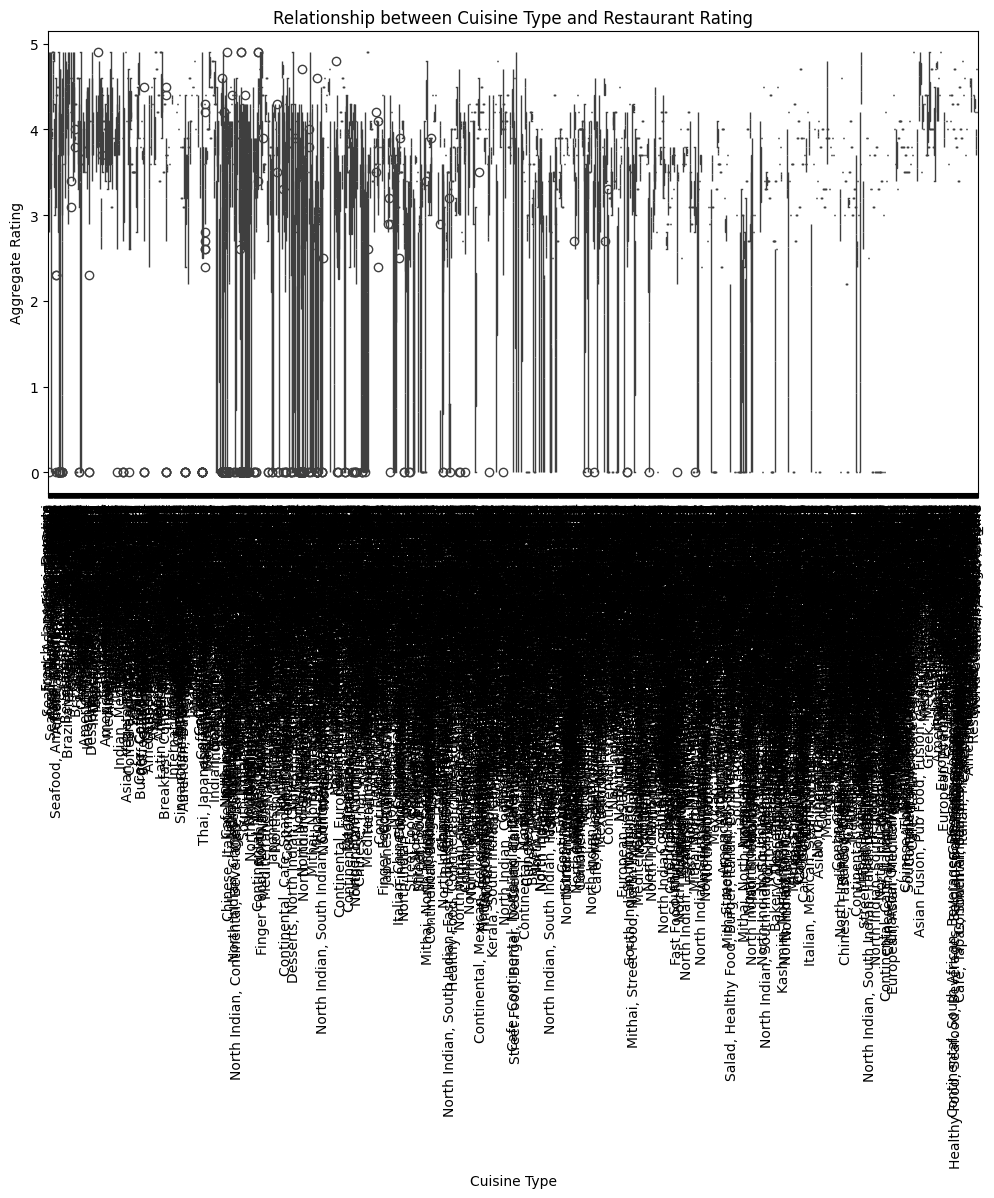

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Relationship between cuisine type and restaurant rating
plt.figure(figsize=(12, 6))
sns.boxplot(x='Cuisines', y='Aggregate rating', data=data)
plt.xticks(rotation=90)
plt.title('Relationship between Cuisine Type and Restaurant Rating')
plt.xlabel('Cuisine Type')
plt.ylabel('Aggregate Rating')
plt.show()


In [ ]:
# Most popular cuisines based on the number of votes
top_cuisines_by_votes = data.groupby('Cuisines')['Votes'].sum().sort_values(ascending=False).head(10)
print("Top Cuisines by Number of Votes:")
print(top_cuisines_by_votes)


Top Cuisines by Number of Votes:
Cuisines
North Indian, Mughlai             53747
North Indian                      46241
North Indian, Chinese             42012
Cafe                              30657
Chinese                           21925
North Indian, Mughlai, Chinese    20115
Fast Food                         17852
South Indian                      16433
Mughlai, North Indian             15275
Italian                           14799
Name: Votes, dtype: int64


In [ ]:
# Average rating for each cuisine
average_rating_by_cuisine = data.groupby('Cuisines')['Aggregate rating'].mean().sort_values(ascending=False)
print("\nAverage Rating for Each Cuisine:")
print(average_rating_by_cuisine)



Average Rating for Each Cuisine:
Cuisines
Italian, Deli                     4.9
Hawaiian, Seafood                 4.9
American, Sandwich, Tea           4.9
Continental, Indian               4.9
European, Asian, Indian           4.9
                                 ... 
Fast Food, Desserts, Beverages    0.0
Fast Food, Chinese, Burger        0.0
Cafe, French                      0.0
Seafood, Mughlai, North Indian    0.0
Fast Food, Mughlai, Armenian      0.0
Name: Aggregate rating, Length: 1825, dtype: float64


**LEVEL 3 TASK 3: Data Visualization**

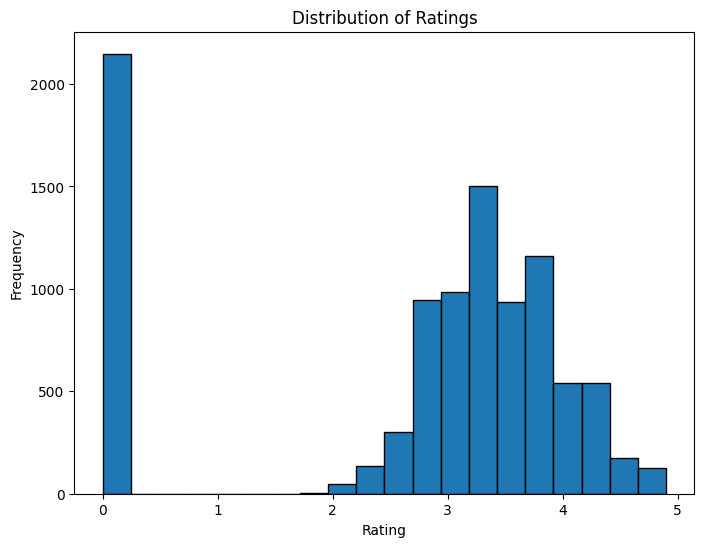

In [ ]:
import matplotlib.pyplot as plt

# Distribution of ratings using a histogram
plt.figure(figsize=(8, 6))
plt.hist(data['Aggregate rating'], bins=20, edgecolor='black')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()


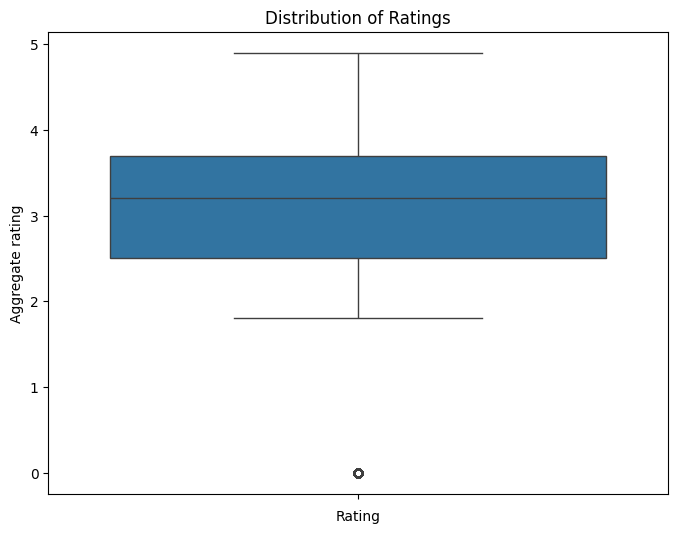

In [ ]:
import seaborn as sns

# Distribution of ratings using a box plot
plt.figure(figsize=(8, 6))
sns.boxplot(data['Aggregate rating'])
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.show()


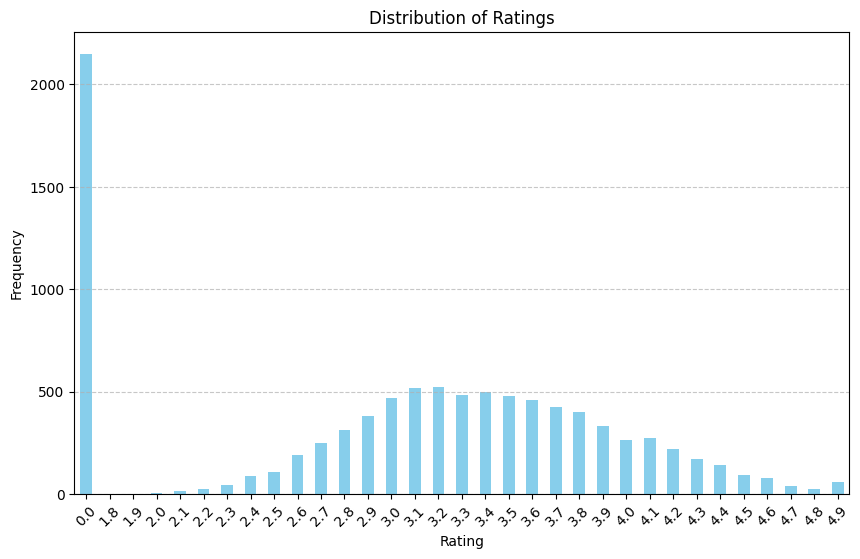

In [ ]:
# Count the frequency of each rating
rating_counts = data['Aggregate rating'].value_counts().sort_index()

# Plotting the bar chart
plt.figure(figsize=(10, 6))
rating_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


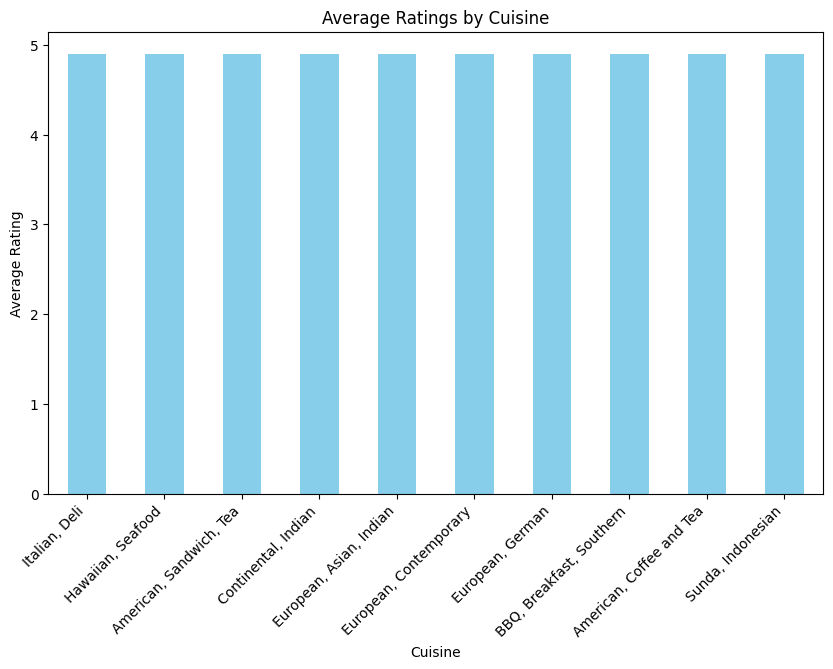

In [ ]:
# Average ratings of different cuisines
avg_rating_by_cuisine = data.groupby('Cuisines')['Aggregate rating'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
avg_rating_by_cuisine.plot(kind='bar', color='skyblue')
plt.title('Average Ratings by Cuisine')
plt.xlabel('Cuisine')
plt.ylabel('Average Rating')
plt.xticks(rotation=45, ha='right')
plt.show()


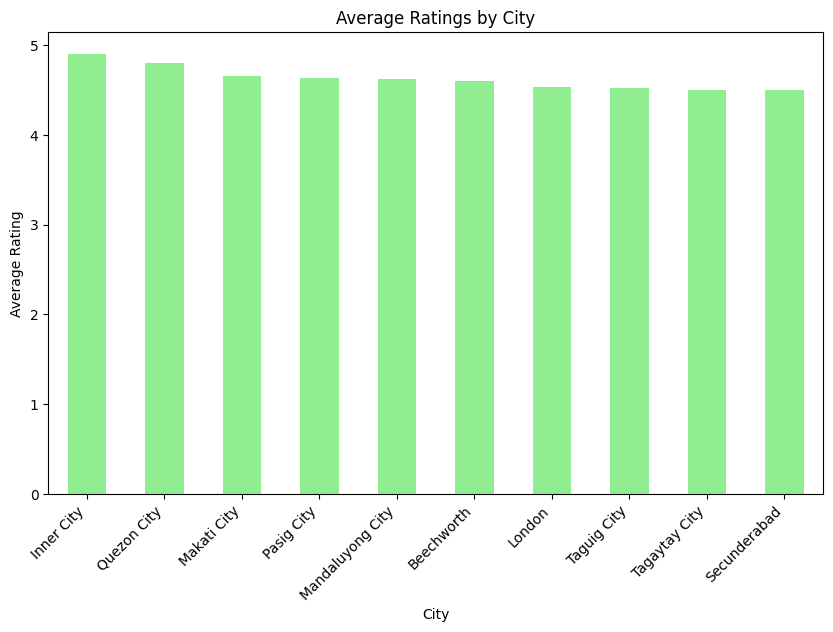

In [ ]:
# Average ratings of different cities
avg_rating_by_city = data.groupby('City')['Aggregate rating'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
avg_rating_by_city.plot(kind='bar', color='lightgreen')
plt.title('Average Ratings by City')
plt.xlabel('City')
plt.ylabel('Average Rating')
plt.xticks(rotation=45, ha='right')
plt.show()


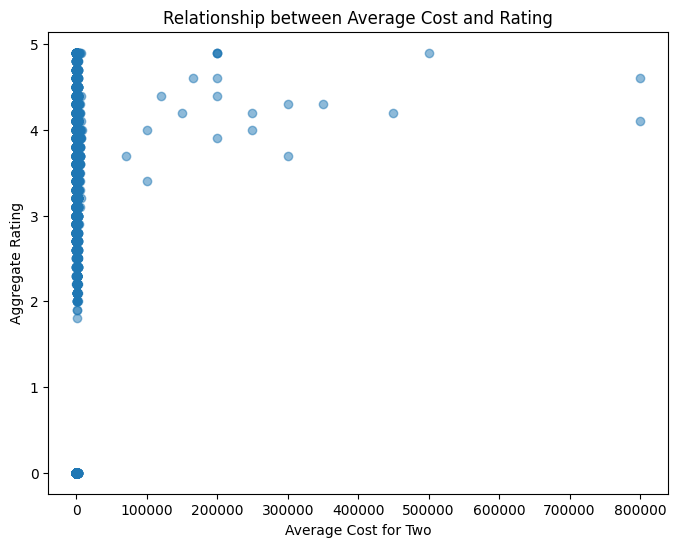

In [ ]:
# Scatter plot for relationship between average cost and rating
plt.figure(figsize=(8, 6))
plt.scatter(data['Average Cost for two'], data['Aggregate rating'], alpha=0.5)
plt.title('Relationship between Average Cost and Rating')
plt.xlabel('Average Cost for Two')
plt.ylabel('Aggregate Rating')
plt.show()


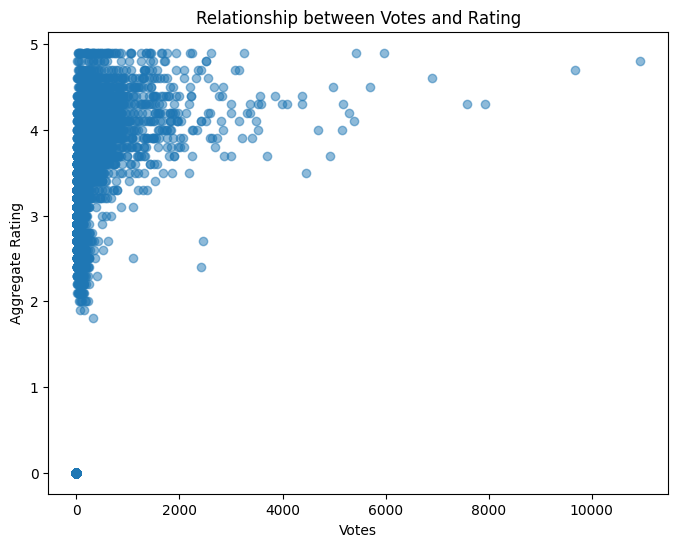

In [ ]:
# Scatter plot for relationship between votes and rating
plt.figure(figsize=(8, 6))
plt.scatter(data['Votes'], data['Aggregate rating'], alpha=0.5)
plt.title('Relationship between Votes and Rating')
plt.xlabel('Votes')
plt.ylabel('Aggregate Rating')
plt.show()


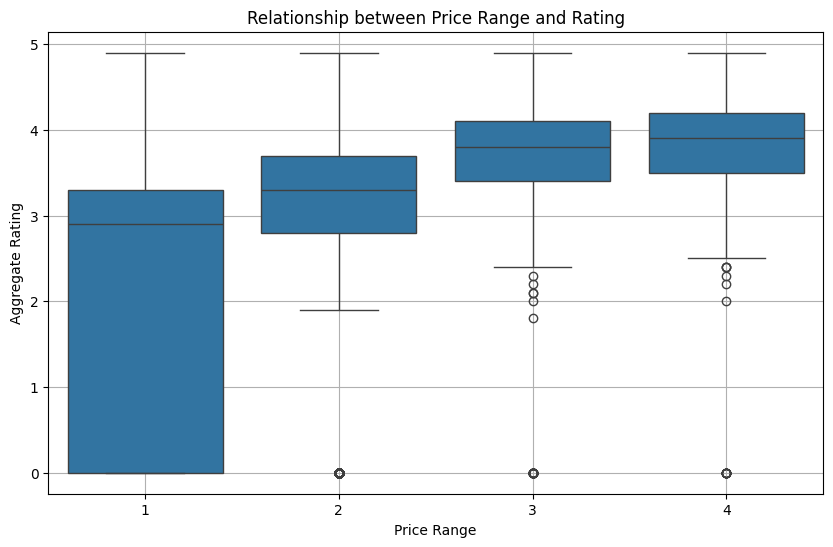

In [ ]:
# Relationship between Price Range and Rating

plt.figure(figsize=(10, 6))
sns.boxplot(x='Price range', y='Aggregate rating', data=data)
plt.title('Relationship between Price Range and Rating')
plt.xlabel('Price Range')
plt.ylabel('Aggregate Rating')
plt.grid(True)
plt.show()


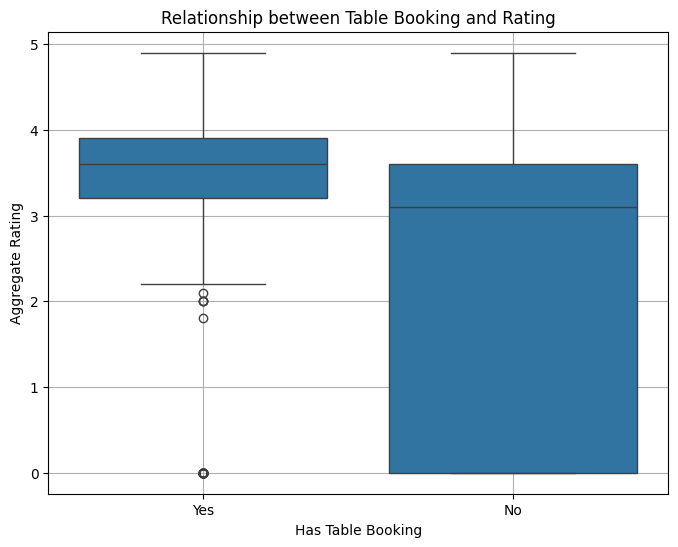

In [ ]:
# Relationship between Table Booking and Rating

plt.figure(figsize=(8, 6))
sns.boxplot(x='Has Table booking', y='Aggregate rating', data=data)
plt.title('Relationship between Table Booking and Rating')
plt.xlabel('Has Table Booking')
plt.ylabel('Aggregate Rating')
plt.grid(True)
plt.show()
